#  Q1

In [2068]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

### Part a) Define the features that are related to predicting the Chance of Admit, and normalize them. 

In [2069]:
df = pd.read_csv('~/Downloads/admissions.csv')
predictors = df[df.columns[1:8]]
prd = predictors#.drop(["TOEFL Score","University Rating","SOP","LOR ","Research","CGPA","GRE Score"],axis=1)
norm = (prd-prd.min())/(prd.max()-prd.min())
data_array = norm.values
chances = df.iloc[:,-1]
chances_array = chances.values
chances_array = chances_array.reshape((1,-1))
chances_array = chances_array.T

### Part b) Fill  in  the  code  for  a  simple  perceptron. 

In [2070]:
class simple_perceptron():
    def __init__(self,input_dim,output_dim,learning_rate=0.0001,activation=lambda x:x,activation_grad=lambda x:1):
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.activation=activation
        self.activation_grad=activation_grad
        self.lr=learning_rate
        ### initialize parameters ###
        self.weights=np.random.rand(self.input_dim)/20
        self.weights= self.weights.reshape(1,-1).T
        self.biases=np.random.rand(1)/20
        self.biases = self.biases.reshape((1,-1)).T

    def predict(self,X):
        if len(X.shape)==1:
            X=X.reshape((1,-1))
        dim=X.shape[1]
        # Check that the dimension of accepted input data is the same as expected
        if not dim==self.input_dim:
            raise Exception("Expected input size %d, accepted %d!"%(self.input_dim,dim))
        # Calculate logit and activation
        self.z = X.dot(self.weights)+self.biases   #shape(X.shape[0],1)
        self.a = self.activation(self.z)             #shape(X.shape[0],1)
        #self.a = np.rint(self.a)
        return self.a
    
    def fit(self,X,y):
        # Transform the single-sample data into 2-dimensional, for the convenience of matrix multiplication
        if len(X.shape)==1:
            X=X.reshape((1,-1))
        if len(y.shape)==1:
            print("resahojieowfhiowfh")
            y=y.reshape((1,-1))
        q = self.predict(X)
        errors=(q-y)*self.activation_grad(self.z)
        #print(X.shape)
        weights_grad=errors.T.dot(X)
        weights_grad=weights_grad.T
        bias_grad=np.sum(errors,axis=0)
        # Update weights and biases from the gradient
        self.weights=self.weights - self.lr*weights_grad
        self.biases= self.biases - self.lr*bias_grad
        
    def train_on_epoch(self,X,y,batch_size=32):
        # Every time select batch_size samples from the training set, until all data in the training set has been trained once
        order=list(range(X.shape[0]))
        random.shuffle(order)
        n=0
        while n<math.ceil(len(order)/batch_size)-1: # Parts that can fill one batch
            self.fit(X[order[n*batch_size:(n+1)*batch_size]],y[order[n*batch_size:(n+1)*batch_size]])
            n+=1
        # Parts that cannot fill one batch
        self.fit(X[order[n*batch_size:]],y[order[n*batch_size:]])
        
    def evaluate(self,X,y):
         # Transform the single-sample data into 2-dimensional
        if len(X.shape)==1:
            X=X.reshape((1,-1))
        if len(y.shape)==1:
            print("resahojieowfhiowfh")
            y=y.reshape((1,-1))
        ### means square error ###
        return 0.5*(np.square(self.predict(X)-y)).mean()
    
    def get_weights(self):
        return (self.weights,self.biases)
    
    def set_weights(self,weights):
        self.weights=weights[0]
        self.biases=weights[1]

### Part c) Use 80% of the data for training and 20% of the data for testing and do 5-fold validation. Use a learning rate of 0.0001. Are the features good indicators for getting into graduate school? Now remove the GRE scores and do the same test; are GRE scores important? 

Number of epochs with lowest validation: 30
Train error: 0.004648931161790533
Test error: 0.004624977073737738
Number of epochs with lowest validation: 30
Train error: 0.03746390661546088
Test error: 0.043275889360181265
Number of epochs with lowest validation: 30
Train error: 0.018312951688273543
Test error: 0.01754686403749906
Number of epochs with lowest validation: 30
Train error: 0.010928124559910104
Test error: 0.011801763992732498
Number of epochs with lowest validation: 30
Train error: 0.036644535785846324
Test error: 0.03695443739390245
Final results:
Training error:0.021600+-0.013342
Testing error:0.022841+-0.014822
[[ 15.64617212]
 [-26.49060846]
 [-21.54153017]
 [-14.38681506]
 [ 20.19003205]
 [ 31.28132516]
 [ 25.19791138]
 [ 41.22947901]
 [ 38.72599629]
 [-19.37647501]
 [ -6.76638575]
 [ 30.41110302]
 [ 15.16172553]
 [-20.36395385]
 [ 13.47406845]
 [ 28.24237302]
 [-23.03143466]
 [-15.20670177]
 [-26.99583068]
 [ 25.55283129]]


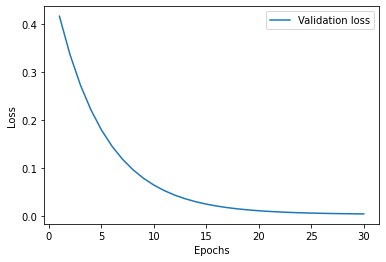

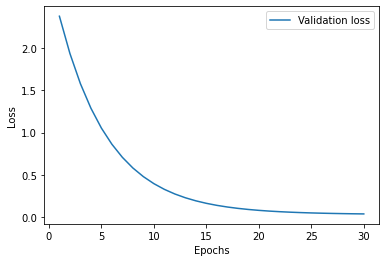

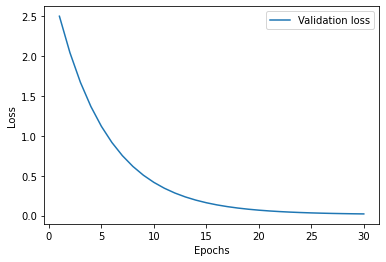

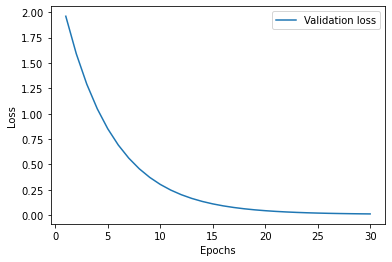

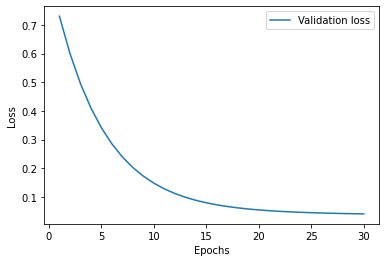

In [2071]:
from sklearn.model_selection import train_test_split,KFold


def Kfold(k,Xs,ys,epochs,learning_rate=0.0001,activation=lambda x:x,activation_grad=lambda x:1,draw_curve=True):
    # The total number of examples for training the network
    total_num=len(Xs)
    
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    # record error for each model
    train_error_all=[]
    test_error_all=[]
    
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decide training examples and testing examples for this fold
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        

        val_array=[]
        # Split training examples further into training and validation
        train_in,val_in,train_real,val_real=train_test_split(train_Xs,train_ys)
        
        ### Establish the model here ###
        model=simple_perceptron(Xs.shape[1],1,learning_rate,activation,activation_grad)
        
        # Save the lowest weights, so that we can recover the best model
        weights = model.get_weights()
        lowest_val_err = np.inf
        for _ in range(epochs):
            # Train model on a number of epochs, and test performance in the validation set
            model.train_on_epoch(train_in,train_real)
            val_err = model.evaluate(val_in,val_real)
            val_array.append(val_err)
            if val_err < lowest_val_err:
                lowest_val_err = val_err
                weights = model.get_weights()

        # The final number of epochs is when the minimum error in validation set occurs    
        final_epochs=np.argmin(val_array)+1
        print("Number of epochs with lowest validation:",final_epochs)
        # Recover the model weight
        model.set_weights(weights)

        # Report result for this fold
        train_error=model.evaluate(train_Xs,train_ys)
        train_error_all.append(train_error)
        test_error=model.evaluate(test_Xs,test_ys)
        test_error_all.append(test_error)
        print("Train error:",train_error)
        print("Test error:",test_error)
        
        if draw_curve:
            plt.figure()
            plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            
    print("Final results:")
    print("Training error:%f+-%f"%(np.average(train_error_all),np.std(train_error_all)))
    print("Testing error:%f+-%f"%(np.average(test_error_all),np.std(test_error_all)))
    
    # return the last model
    return model
last = Kfold(5,data_array,chances_array,30,0.0001)

print((last.predict(data_array[100:120])-chances_array[100:120])*100)

Number of epochs with lowest validation: 30
Train error: 0.04247273817593596
Test error: 0.042905202351053155
Number of epochs with lowest validation: 30
Train error: 0.056711602020509365
Test error: 0.05134428376520723
Number of epochs with lowest validation: 30
Train error: 0.04740278868778305
Test error: 0.046951629991607916
Number of epochs with lowest validation: 30
Train error: 0.010650402268633206
Test error: 0.009439908142314359
Number of epochs with lowest validation: 30
Train error: 0.02886669330142008
Test error: 0.028960577007510865
Final results:
Training error:0.037221+-0.016043
Testing error:0.035920+-0.015219
[[ 15.26113851]
 [-13.47489388]
 [  7.13070446]
 [ 12.6127057 ]
 [ 20.14962008]
 [ 28.90381254]
 [ 26.19990632]
 [ 23.25579087]
 [ 45.84257201]
 [ 32.43544459]
 [ 28.37361088]
 [ 36.1171319 ]
 [ 24.82779543]
 [  4.58981342]
 [ 22.36770252]
 [ 36.70729024]
 [ 11.91155919]
 [ 19.33065644]
 [  0.0896041 ]
 [ 20.17334703]]


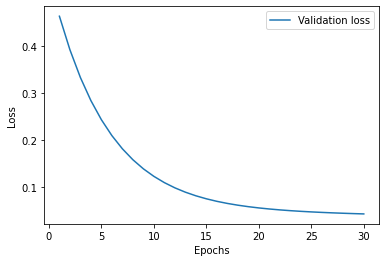

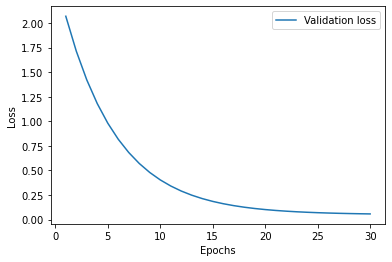

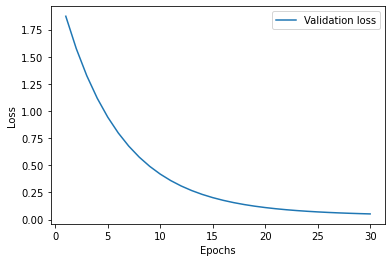

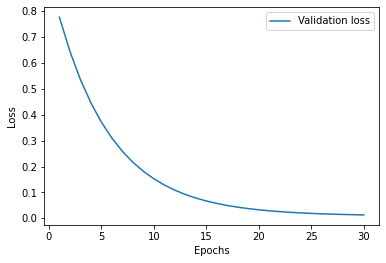

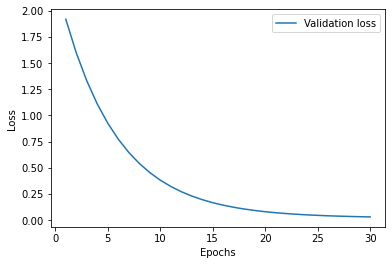

In [2072]:
prd = predictors.drop(["GRE Score"],axis=1)
norm = (prd-prd.min())/(prd.max()-prd.min())
data_array = norm.values

no_GRE = Kfold(5,data_array,chances_array,30)
print((no_GRE.predict(data_array[100:120])-chances_array[100:120])*100)

#### The features are indeed good indicators for getting into grad school with test errors of around 0.0050. For more context, I looked at the difference between the predicted and actual chances of admissions for a random set of 20 samples and on average there was a 5% difference between each value, which means the model works pretty well.

#### When dropping the GRE scores from our dataset, the test errors wwent up to around 0.0055 on average, with random sets of 20 samples having about a 6% difference between each value. GRE scores seem to marginally improve the predictions of our model, but they are not necessary in yielding accurate results, so their is small but nonzero when taking all other features as inputs to the model.


# Q2

### Part a) Process the dataset. What changes from problem 1? Filter out data with missing features

In [2073]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#processes predictors
df2 = pd.read_csv('~/Downloads/titanic.csv')
prd = df2.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)
prd = prd.dropna()
pd.set_option("display.max_rows", None, "display.max_columns", None)

#normalizes numerical predictors
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x=prd.drop(["Pclass","Sex","Embarked","Survived"],axis=1).values
x_norm = scaler.fit_transform(x)

#one hot encoder for survival
encoder = OneHotEncoder()
y=prd['Survived']
y = y.values.reshape((1,-1))
y = y.T
encoder.fit(y)
y = encoder.transform(y).toarray()
import sys
np.set_printoptions(threshold=sys.maxsize)

#hot encode categorical features,normalize and add to numerical
categorical_feats = prd[["Embarked","Sex","Pclass"]]
encoder.fit(categorical_feats)
input_cate_feats = encoder.transform(categorical_feats).toarray()
input_cate_feats = scaler.fit_transform(input_cate_feats)
feats = np.hstack((x_norm,input_cate_feats))


#### There are several differences in the data, including columns with information not pertinent to calculating the survival rate (such as name and cabin), categorical features (Pclass,sex,embarked) which must be converted to ordinal numerical values using a one hot encoder, rows with missing data which must be removed in the context of the problem, and the output should be two probabilities, one corresponding to the chance of death, and the other the chance of survival

###  (b) (4pt) Use the simple perceptome model we developed in Q1. Use 80% of the data for training and 20% of  the  data  for  testing  and  do  5-fold  validation.  Can  we  predict  who  will  survive?  Play  around  with  the features to determine which ones give you a better chance to get back to shore.

Number of epochs with lowest validation: 26
Train error: 0.06782131765241117
Test error: 0.09335866730081831
Number of epochs with lowest validation: 40
Train error: 0.07318110504049166
Test error: 0.07249692933270926
Number of epochs with lowest validation: 39
Train error: 0.07519792375625199
Test error: 0.06119628591089313
Number of epochs with lowest validation: 40
Train error: 0.07048633959193647
Test error: 0.0810088345873332
Number of epochs with lowest validation: 30
Train error: 0.07452849236459458
Test error: 0.065559523435906
Final results:
Training error:0.072243+-0.002738
Testing error:0.074724+-0.011478
[ 79. 207.]
[356.  67.]


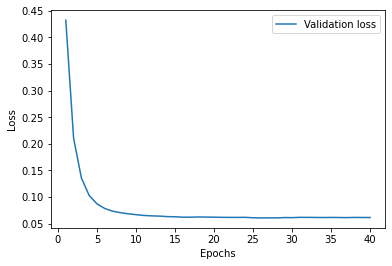

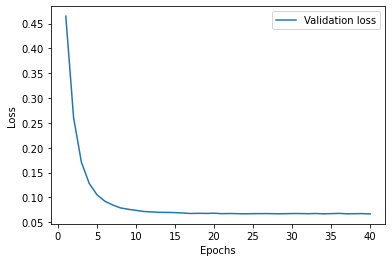

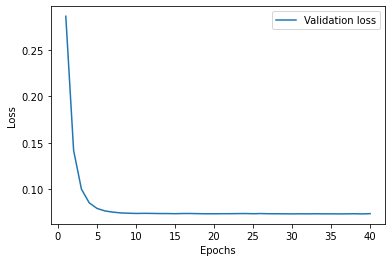

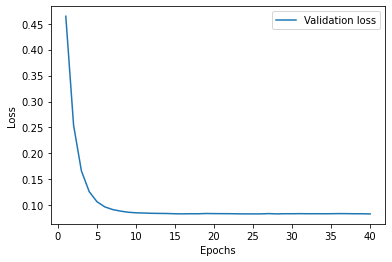

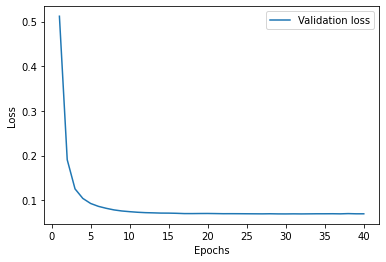

In [2074]:
#model
titan = Kfold(5,feats,y,40,0.001)

#check predicted values for people who survived
mask1 = prd.values[:,0] == 1
ones = np.rint(titan.predict(feats[mask1]))
print(ones.sum(axis = 0))

#check predicted values for people who didn't survive
mask0 = prd.values[:,0] == 0
zeros = np.rint(titan.predict(feats[mask0]))
print(zeros.sum(axis = 0))

We can correctly determine, on average, 73% of the people who survived when inputted, and 85% of the people who died when inputted. There is an imbalance in the data (almost twice of the people died compared to survived), which creates this discrepancy in getting a correct result and which led to poorer performance when training the model. Sex, Pclass and Age were the most important features in determining who survived as the validation error increased when removing them. Lower age (children), females of lower class had higher chances of survival

# Q3

### a) (2pt)  Use the generate_data() function provided in the reference file to generate the training data (5000 points). Do 5-fold cross validation with the simple perceptron model. How well is the prediction? 

((5000,), (5000,))

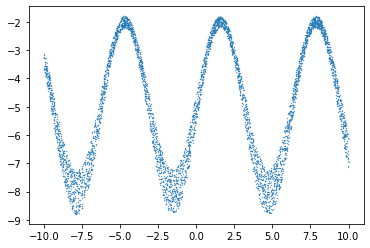

In [2114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_X(number):
    xs=(np.random.random(number)*2-1)*10
    return xs
    
def generate_data(number,stochascity=0.05):
    xs=generate_X(number)
    fs=3*np.sin(xs)-5
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return xs,fs*stochastic_ratio

x,y=generate_data(5000,0.1)
plt.scatter(x,y,s=0.1)
x.shape,y.shape

Number of epochs with lowest validation: 26
Train error: 2.1347100210127263
Test error: 2.129403070940902
Number of epochs with lowest validation: 28
Train error: 2.140389180462296
Test error: 2.113357047969226
Number of epochs with lowest validation: 29
Train error: 2.110166810922675
Test error: 2.2416228760613106
Number of epochs with lowest validation: 24
Train error: 2.1348260567722304
Test error: 2.1348037231508523
Number of epochs with lowest validation: 30
Train error: 2.152757282184487
Test error: 2.0669177570308346
Final results:
Training error:2.134570+-0.013858
Testing error:2.137221+-0.057409


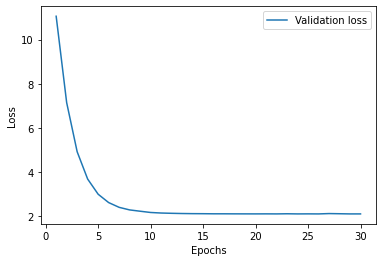

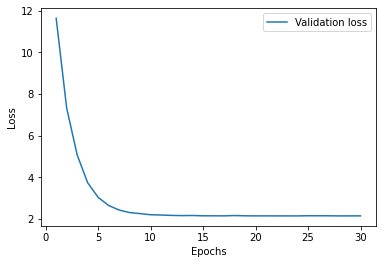

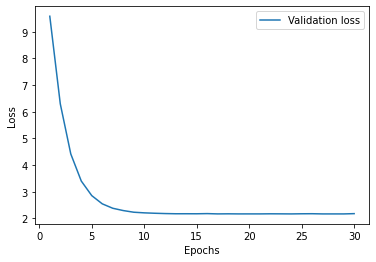

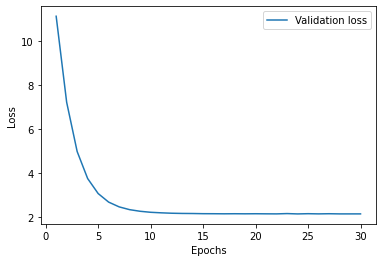

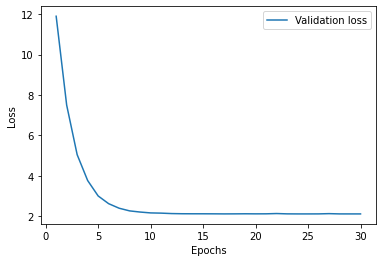

In [2109]:
x = x.reshape((1,-1)).T
y = y.reshape((1,-1)).T

sin_model = Kfold(5,x,y,30,0.0001)
test_points,real = generate_data(1000,0.1)
predicted = sin_model.predict(test_points.reshape(1,-1).T)

#x = x.reshape((-1,))

Correlation coefficient: 0.22193772275333573


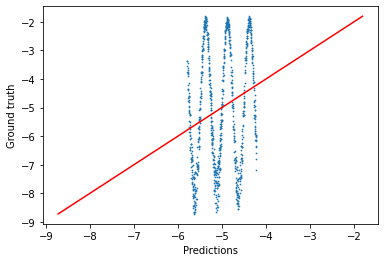

In [2110]:
def show_correlation(xs,ys):
    plt.figure()
    plt.scatter(xs,ys,s=0.5)
    r = [np.min([np.min(xs),np.min(ys)]),np.max([np.max(xs),np.max(ys)])]
    plt.plot(r,r,'r')
    plt.xlabel("Predictions")
    plt.ylabel("Ground truth")
    corr=np.corrcoef([xs,ys])[1,0]
    print("Correlation coefficient:",corr)

predicted = predicted.reshape((-1,))
real = real.reshape((-1,))

show_correlation(predicted,real)

The model did very poorly on the dataset with a correlation coeff of 0.2. This is unsurprising as the simple perceptron performs a linear regression and the dataset has the shape of a non-linear, sine wave.

#### b) (3pt) Use the multilayer perceptron regressor of scikit-learn as a simple fully connected neural network. Use one hidden layer first. Do 5-fold cross validation with this simple ANN, and report the MSE on each fold.  

In [2115]:
from sklearn.neural_network import MLPRegressor

def KFold_NN(k,Xs,ys,hidden_layers,epochs=1000,lr=0.001,):
    # The total number of examples for training the network
    total_num=len(Xs)

    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    train_error_all=[]
    test_error_all=[]
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decite training examples and testing examples for this fold
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        
        # Establish the model here
        model = MLPRegressor(max_iter=epochs, activation='tanh', early_stopping=True, 
                             validation_fraction=0.25, learning_rate='constant', learning_rate_init=lr,
                             hidden_layer_sizes=hidden_layers).fit(train_Xs, train_ys)
        
        ### Report result for this fold ##
        train_error=0.5*np.square(model.predict(train_Xs).reshape((-1,1))-train_ys).mean()
        train_error_all.append(train_error)
        test_error=0.5*np.square(model.predict(test_Xs).reshape((-1,1))-test_ys).mean()
        test_error_all.append(test_error)
        print("Train error:",train_error)
        print("Test error:",test_error)

    print("Final results:")
    print("Training error:%f+-%f"%(np.average(train_error_all),np.std(train_error_all)))
    print("Testing error:%f+-%f"%(np.average(test_error_all),np.std(test_error_all)))
    
    # return the last model
    return model


Train error: 0.3053909879025213
Test error: 0.3034200718524478
Train error: 0.27211050038721213
Test error: 0.2710231245203349
Train error: 2.077511370225827
Test error: 2.10247011439723
Train error: 0.23959114322796346
Test error: 0.21710702245572963
Train error: 0.24883231467730996
Test error: 0.28029280756376446
Final results:
Training error:0.628687+-0.724768
Testing error:0.634863+-0.734349
Correlation coefficient: 0.9569220402906878


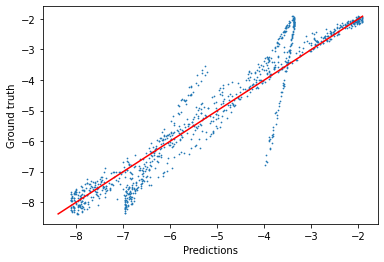

In [2124]:
model = KFold_NN(5,x.reshape((-1,1)),y.reshape((-1,1)),100)
test_points,real = generate_data(1000)
predicted = model.predict(test_points.reshape(1,-1).T)
predicted = predicted.reshape(1000,)

show_correlation(predicted,real)


The results are much better, with 100 layers yielding a 95% correlation coeff.

Train error: 0.2528255408514786
Test error: 0.24446502433056924
Train error: 2.0453866407586534
Test error: 2.121464536027536
Train error: 0.2662786903942825
Test error: 0.276858585913871
Train error: 0.24677048108495303
Test error: 0.22937964389674356
Train error: 0.2952049483632341
Test error: 0.30714092777533697
Final results:
Training error:0.621293+-0.712242
Testing error:0.635862+-0.743287
Correlation coefficient: 0.9537640908948478


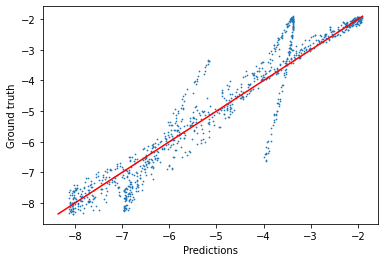

In [2126]:
def KFold_NN(k,Xs,ys,hidden_layers,epochs=1000,lr=0.001,):
    # The total number of examples for training the network
    total_num=len(Xs)

    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    train_error_all=[]
    test_error_all=[]
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decite training examples and testing examples for this fold
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        
        # Establish the model here
        model = MLPRegressor(max_iter=epochs, activation='tanh', early_stopping=True, 
                             validation_fraction=0.25, learning_rate='constant', learning_rate_init=lr,
                             hidden_layer_sizes=hidden_layers).fit(train_Xs, train_ys)
        
        ### Report result for this fold ##
        train_error=0.5*np.square(model.predict(train_Xs).reshape((-1,1))-train_ys).mean()
        train_error_all.append(train_error)
        test_error=0.5*np.square(model.predict(test_Xs).reshape((-1,1))-test_ys).mean()
        test_error_all.append(test_error)
        print("Train error:",train_error)
        print("Test error:",test_error)

    print("Final results:")
    print("Training error:%f+-%f"%(np.average(train_error_all),np.std(train_error_all)))
    print("Testing error:%f+-%f"%(np.average(test_error_all),np.std(test_error_all)))
    
    # return the last model
    return model

model2 = KFold_NN(5,x.reshape((-1,1)),y.reshape((-1,1)),120)
test_points,real = generate_data(1000)
predicted = model.predict(test_points.reshape(1,-1).T)
predicted = predicted.reshape(1000,)

show_correlation(predicted,real)

The model did better with 120 hidden layers instead of 100, and an adaptive learning rate